<div class="alert alert-block alert-success"> 
<h1>Task 2 - Discrete distributions</h1>
</div>

Постройте в Python функцию **binom_analysis** (для всех расчетов используйте binom из scipy.stats)**.** 

**На вход она берет:**

- n — количество экспериментов,
- p — вероятность успеха,
- sample_size — размер выборки для построения выборочной функции плотности (по умолчанию составляет 10 000).

**Функция должна уметь:**

1. Расчет среднего, дисперсии и стандартного отклонения биномиального распределения с заданными параметрами и print этих показателей с расшифровками.
1. Расчет ряда кумулятивных вероятностей (функция распределения) для всех k, пробегающих от 0 до n (ряд **cdf**).
1. Расчет ряда некумулятивных вероятностей (функция плотности вероятности) для всех k, пробегающих от 0 до n.
1. Собирает в единый датафрейм ряд k, ряд cdf, ряд pdf.
1. Добавить в этот датафрейм ряд биномиальных коэффициентов, которые рассчитываются отдельной функцией **binom_coeff** (использовать функцию comb из scipy.special).
1. Отображение barplot (seaborn) функции распределения и функции плотности (на двух разных графиках). Установить размер (figsize) на (20, 10). Сделать ротацию тиков на X-оси на 60 градусов.
1. Отображение histplot (seaborn) функции плотности выборочного распределения Бернулли (на основании sample_size). Для создания рандомной выборки использовать функцию **rvs** из binom.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.special import comb

In [32]:
# n — количество экспериментов
# p — вероятность успехаb
# sample_size — размер выборки для построения выборочной функции плотности

sample_size, n, p = 10000, 10, 0.7

In [33]:
# функция вычисления биномиальных коэффициентов

def binom_coeff (n, k):
    return comb(n, k)

In [34]:
def binom_analysis (sample_size, n, p):
    
    
#     считаю среднее, дисперсию и ст.отклонение биноминального распределения
    print('Математическое ожидание:', n*p)
    print('Дисперсия: %.3f' % float(n*p*(1-p)))
    print('Стандартное отклонение: %.3f' % (n*p)**0.5)
    
    
#     считаю интегральную функцию распределения
    pb = binom(n, p) # applying the binom class
    k = np.arange(0, n+1)
    binomial_cdf = pb.cdf(k) # Cumulative distribution function (кумулятивное распределение)
    
    
#     считаю дифференциальную функцию распределения
    binomial_pmf = pb.pmf(k) # Probability mass function (распределение плотности, вероятностная масса)
    
    
#     собираю в единый DataFrame.
    binom_distribution_df = pd.DataFrame([k, binomial_pmf, binomial_cdf],\
                                         index = ['k', 'binomial_cdf', 'binomial_pmf']).transpose()


#     добавляю к датафрейму биномиальные коэффициенты
    binom_distribution_df['binom_coeff']= pd.DataFrame(comb(n, k))
    
    
#     строю столбчатую диаграмму двух распределений (pmf, cdf)
    plt.subplots(figsize=(20,10))
    sns.barplot(x = k, y = binomial_pmf)
    plt.xticks(rotation = 60)
    plt.ylabel('Probability mass')
    plt.xlabel('Intervals')
    plt.show()
    
    plt.subplots(figsize=(20,10))
    sns.barplot(x = k, y = binomial_cdf)
    plt.xticks(rotation = 60)
    plt.ylabel('Cumulative distribution')
    plt.xlabel('Intervals')
    plt.show()


#     строим выборку из биноминального распределения Бернулли
    bernoulli_distribution = bernoulli(p).rvs(size = sample_size)
    
    
#     строю гистограмму для функции плотности выборочного распределения Бернулли
    sns.histplot(bernoulli_distribution, stat='probability')
    plt.title('Распределение Bernoulli')
    plt.show()
    
#     вывожу датафрейм
    return binom_distribution_df
    

Математическое ожидание: 7.0
Дисперсия: 2.100
Стандартное отклонение: 2.646


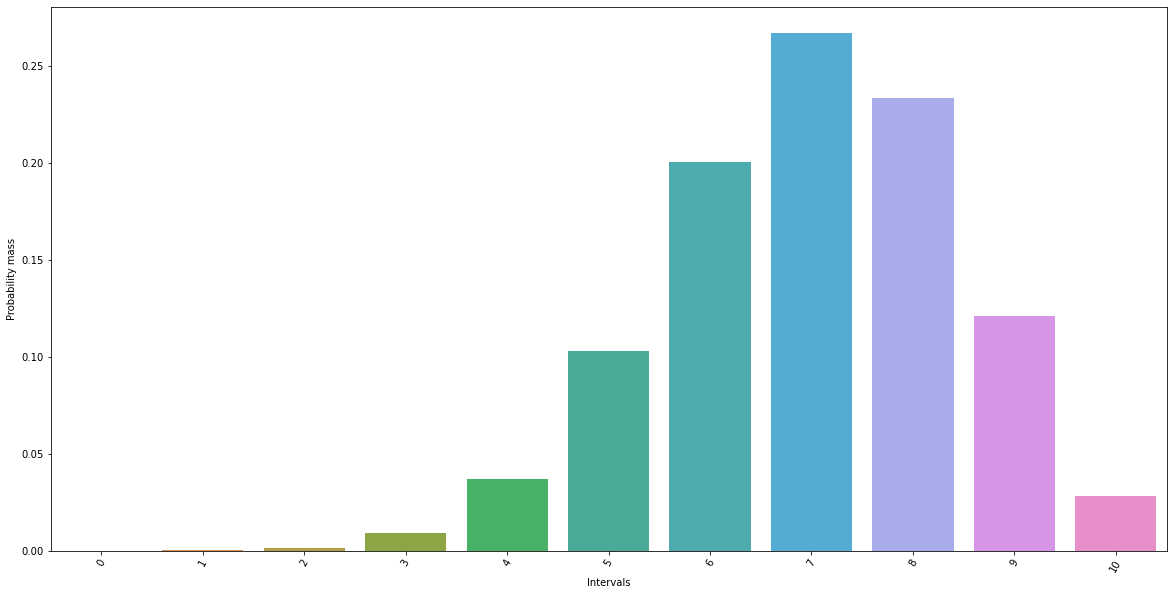

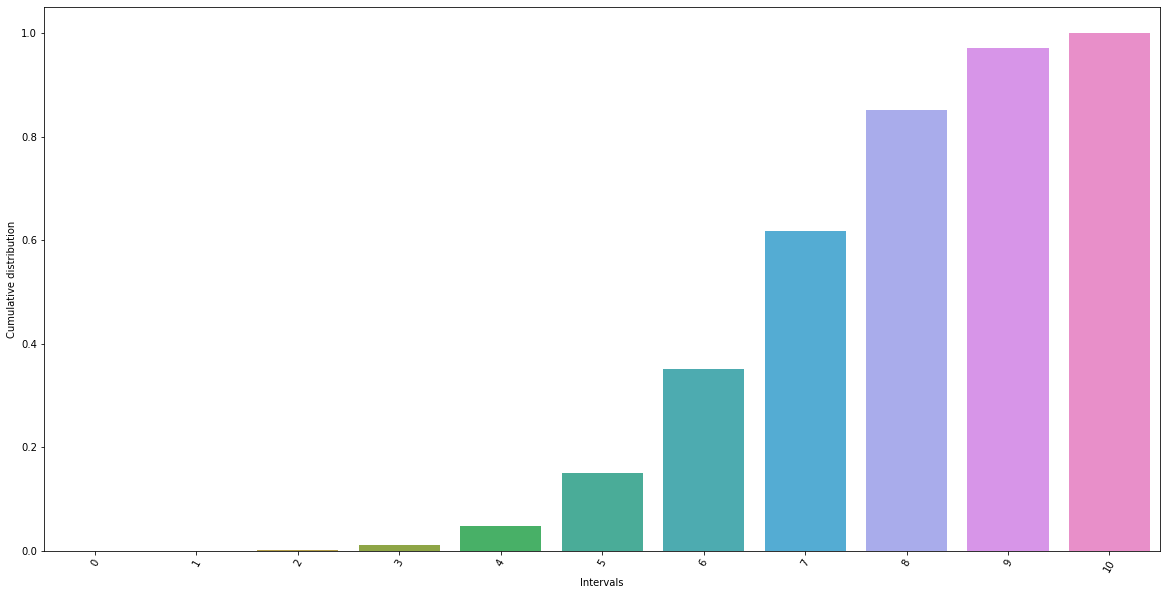

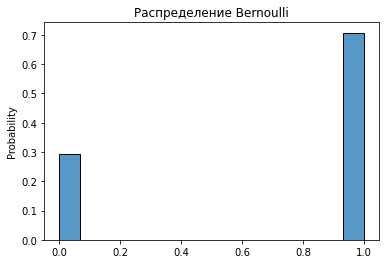

,k,binomial_cdf,binomial_pmf,binom_coeff
0,0.0,0.000006,0.000006,1.0
1,1.0,0.000138,0.000144,10.0
2,2.0,0.001447,0.001590,45.0
3,3.0,0.009002,0.010592,120.0
4,4.0,0.036757,0.047349,210.0
5,5.0,0.102919,0.150268,252.0
6,6.0,0.200121,0.350389,210.0
7,7.0,0.266828,0.617217,120.0
8,8.0,0.233474,0.850692,45.0
9,9.0,0.121061,0.971752,10.0


In [35]:
# вывожу результат работы функции
binom_analysis(sample_size, n, p)